In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np    
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train.shape

(60000, 28, 28)

np.uint8(5)

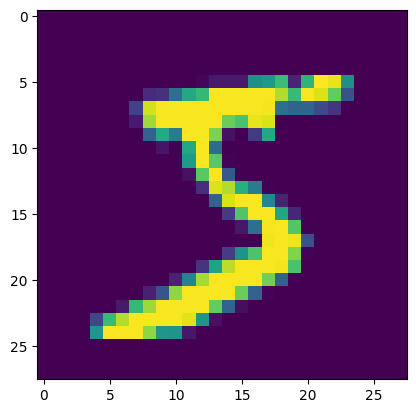

In [5]:
plt.imshow(X_train[0])
y_train[0]

In [6]:
#scaling
X_train=X_train/255
X_test=X_test/255

In [7]:
#2d to 1d array
X_train_flattened=X_train.reshape(len(X_train),28*28) 
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [21]:
#creates a simple neural network model
model=keras.Sequential([
     keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10,activation="sigmoid")]) #dense=all the 784 neurons are connected with all 10 output neuron
#compiling and training a neural network
#The optimizer controls how the model's weights are updated during training.
#The loss function measures how well the model's predictions match the true labels
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8153 - loss: 0.7193
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9120 - loss: 0.3168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9198 - loss: 0.2847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.2642


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.3028    


[0.26680076122283936, 0.9269000291824341]

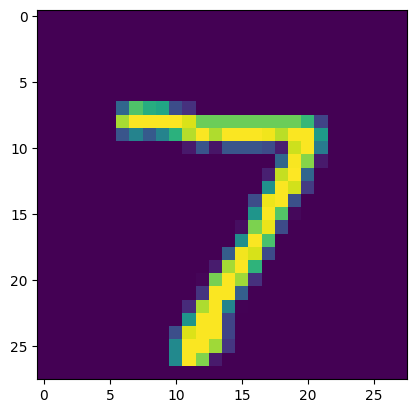

In [23]:
plt.imshow(X_test[0])


In [24]:
y_predicted=model.predict(X_test_flattened)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


np.int64(7)

In [25]:
#generate predictions for the test dataset using the trained (model).
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
#It shows how well your model predicts by comparing the true labels with the predicted labels
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    2,    2,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  933,   14,    7,    4,   13,    9,   36,    4],
       [   4,    0,   24,  917,    0,   24,    2,   10,   23,    6],
       [   1,    1,    6,    1,  919,    0,   11,    4,   11,   28],
       [   8,    3,    7,   23,   10,  787,   16,    5,   27,    6],
       [   9,    3,    8,    1,    7,   10,  915,    2,    3,    0],
       [   1,    6,   29,    5,    7,    0,    0,  954,    2,   24],
       [   5,    8,    7,   20,    9,   26,    9,   12,  872,    6],
       [   9,    7,    2,   12,   34,    8,    0,   31,    6,  900]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

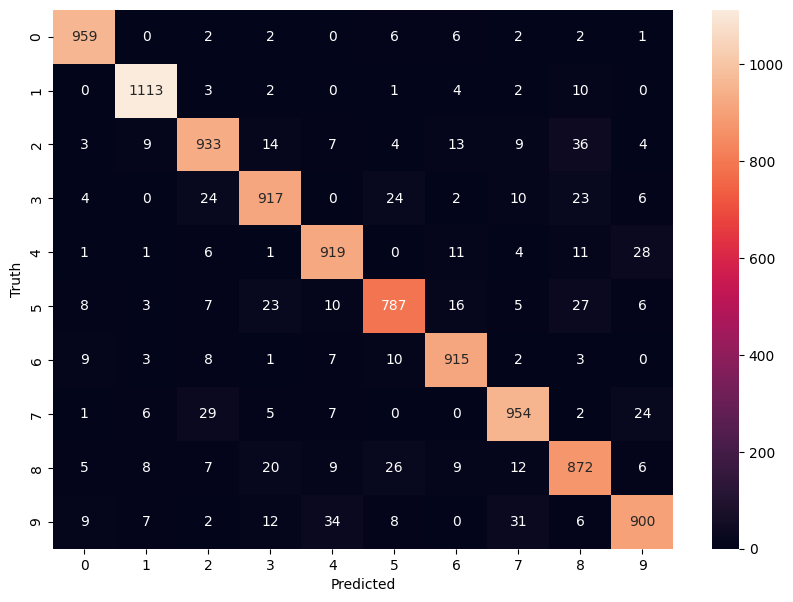

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:


model=keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation="relu"),#adding hidden layer to improve performance
     keras.layers.Dense(10,activation="sigmoid")])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\HP-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8730 - loss: 0.4453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9611 - loss: 0.1331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9745 - loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9798 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9847 - loss: 0.0515


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0933   


[0.07700005173683167, 0.9763000011444092]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


Text(95.72222222222221, 0.5, 'Truth')

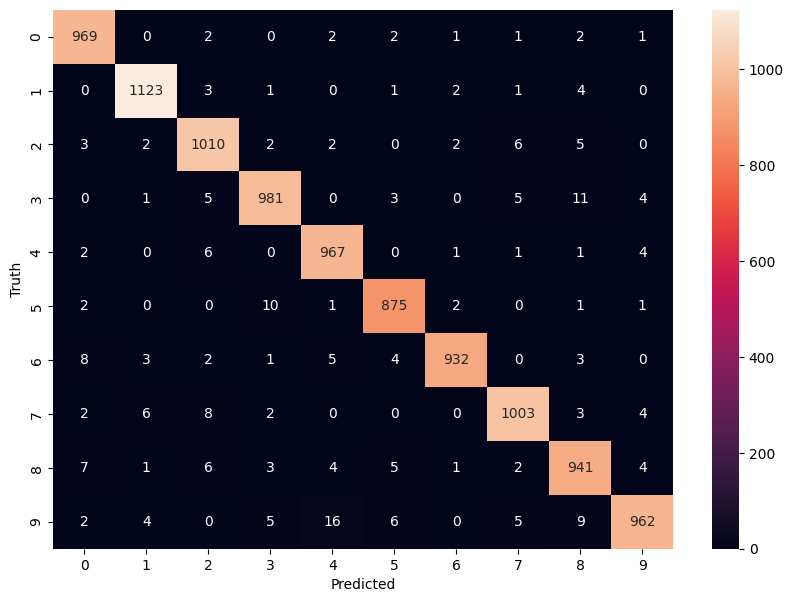

In [31]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')